In [1]:
# Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     warmUpExercise.m
#     plotData.m
#     gradientDescent.m
#     computeCost.m
#     gradientDescentMulti.m
#     computeCostMulti.m
#     featureNormalize.m
#     normalEqn.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s
#

# Initialization - if any is needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion() # in interactive mode, the program continues executing after drawing

/Users/kmatsuda/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.m
def warmUpExercise():
    return np.identity(5)

def part1BasicFunction():
    print "Running warmUpExercise ... \n"
    print "5x5 Identity Matrix: \n"
    return warmUpExercise()

print part1BasicFunction()
# raw_input('Program paused. Press enter to continue.')
# python 3: input('Program paused. Press enter to continue.')

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [3]:
## ======================= Part 2: Plotting =======================
def plotData(x, y):
    plt.plot(x, y, 'ro', label='Training Data')
    plt.axis([4, 24, -5, 25])
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Figure 1: Scatter plot of training data')
    plt.show()

data = np.loadtxt("ex1data1.txt", delimiter=',', skiprows=0)
X = data[:, 0]
X.shape = (len(X),1)
y = data[:, 1]
y.shape = (len(y),1)
m = len(y)  # number of training examples


print data
print y
print X
print m

[[  6.1101   17.592  ]
 [  5.5277    9.1302 ]
 [  8.5186   13.662  ]
 [  7.0032   11.854  ]
 [  5.8598    6.8233 ]
 [  8.3829   11.886  ]
 [  7.4764    4.3483 ]
 [  8.5781   12.     ]
 [  6.4862    6.5987 ]
 [  5.0546    3.8166 ]
 [  5.7107    3.2522 ]
 [ 14.164    15.505  ]
 [  5.734     3.1551 ]
 [  8.4084    7.2258 ]
 [  5.6407    0.71618]
 [  5.3794    3.5129 ]
 [  6.3654    5.3048 ]
 [  5.1301    0.56077]
 [  6.4296    3.6518 ]
 [  7.0708    5.3893 ]
 [  6.1891    3.1386 ]
 [ 20.27     21.767  ]
 [  5.4901    4.263  ]
 [  6.3261    5.1875 ]
 [  5.5649    3.0825 ]
 [ 18.945    22.638  ]
 [ 12.828    13.501  ]
 [ 10.957     7.0467 ]
 [ 13.176    14.692  ]
 [ 22.203    24.147  ]
 [  5.2524   -1.22   ]
 [  6.5894    5.9966 ]
 [  9.2482   12.134  ]
 [  5.8918    1.8495 ]
 [  8.2111    6.5426 ]
 [  7.9334    4.5623 ]
 [  8.0959    4.1164 ]
 [  5.6063    3.3928 ]
 [ 12.836    10.117  ]
 [  6.3534    5.4974 ]
 [  5.4069    0.55657]
 [  6.8825    3.9115 ]
 [ 11.708     5.3854 ]
 [  5.7737 

Plotting Data...



<IPython.core.display.Javascript object>


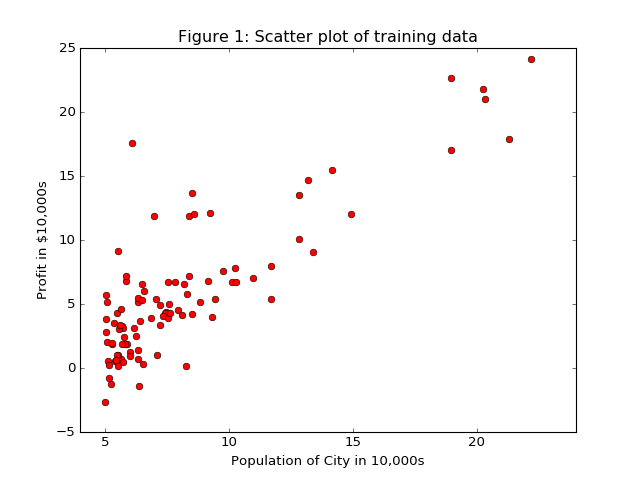

In [12]:
def part2Plotting():
    print "Plotting Data...\n"
    # Plot Data
    # Note: You have to complete the code in plotData.m
    plotData(X, y)

part2Plotting()
#raw_input('Program paused. Press enter to continue.')

In [13]:
## =================== Part 3: Gradient descent ===================
X = np.column_stack((np.ones(m), data[:, 0]))  # Add a column of ones to x
theta = np.zeros((2, 1))  # initialize fitting parameters
print theta
#raw_input('Program paused. Press enter to continue.')

[[ 0.]
 [ 0.]]


In [14]:
#	COMPUTECOST Compute cost for linear regression
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y
def computeCost(x, y, theta):
    # Initialize some useful values
    m = len(y)  # number of training examples

    # You need to return the following variables correctly
    J = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    # print x
    # raw_input('printed x. Press enter to continue.')
    matrixProduct = np.dot(x, theta)
    # print matrixProduct
    # raw_input('printed matrixProduct. Press enter to continue.')
    intermediate = np.subtract(matrixProduct, y)
    #print intermediate
    #raw_input('printed intermediate. Press enter to continue.')
    J = np.divide(np.sum(np.power(intermediate, 2)), (2 * m))
    #print J
    #raw_input('printed J. Press enter to continue.')

    return J

In [15]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))
    for iter in range(iterations):
        hx = np.dot(X, theta)
        theta = theta - (alpha/m)*(np.dot(np.transpose(X),(np.subtract(hx,y))))
        J = computeCost(X, y, theta)
        # print "iter: ", iter, " J: ", J, " theta: ", theta[0], theta[1]
        J_history[iter] = J
    return [theta, J_history]

In [17]:
def part3GradientDescent(theta):
    print "Running Gradient Descent...\n"

    # Some gradient descent settings
    iterations = 1500;
    alpha = 0.01;

    # compute and display initial cost
    J = computeCost(X, y, theta)
    print J

    # run gradient descent
    retval = gradientDescent(X, y, theta, alpha, iterations)

    # gradientDescent returns theta and J_history, use reval[0] to get the theta values calculated
    theta = retval[0]

    # print theta to screen
    print "Theta found by gradient descent: ", theta[0], " ", theta[1]

    plt.plot(X[:,1], np.dot(X, theta), '-', label='Linear Regression')
    plt.legend()
    plt.show()
    predict1 = np.dot([1, 3.5], theta)
    print "For population = 35,000, we predict a profit of ", predict1*10000
    predict2 = np.dot([1, 7], theta)
    print "For population = 70,000, we predict a profit of ", predict2 * 10000

Running Gradient Descent...

32.0727338775
Theta found by gradient descent:  [-3.63029144]   [ 1.16636235]


<IPython.core.display.Javascript object>


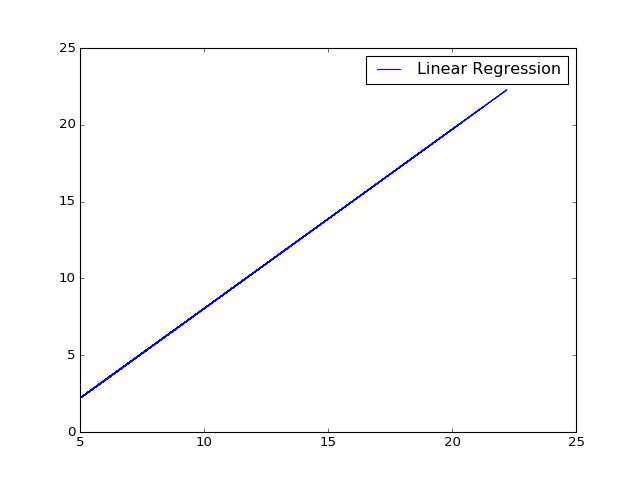

For population = 35,000, we predict a profit of  [ 4519.7678677]
For population = 70,000, we predict a profit of  [ 45342.45012945]


In [18]:
part3GradientDescent(theta)
#raw_input("Program paused. Press enter to continue.\n")

<body>Useful information about contour plots: http://matplotlib.org/examples/pylab_examples/contour_demo.html</body>

Visualizing J(theta_0, theta_1) ...



<IPython.core.display.Javascript object>


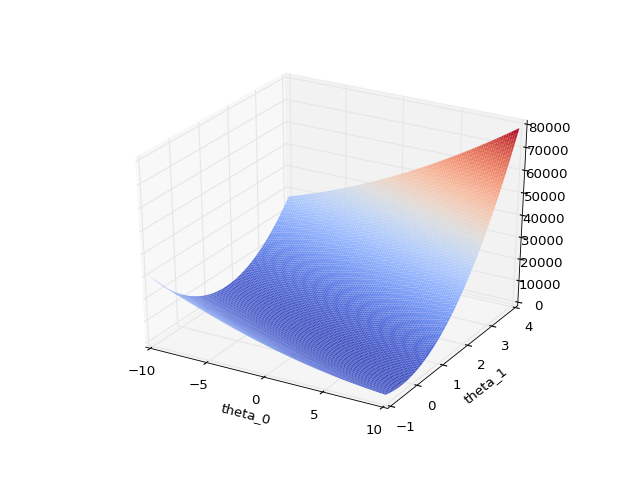

<IPython.core.display.Javascript object>


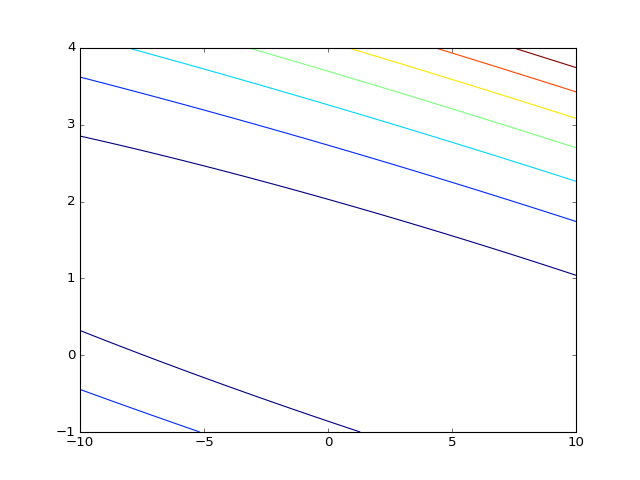

In [25]:
## ============= Part 4: Visualizing J(theta_0, theta_1) =============
print("Visualizing J(theta_0, theta_1) ...\n")

def part4VisualizingJ():
    # Grid over which we will calculate J
    theta0_vals = np.linspace(-10., 10., 100)
    theta1_vals = np.linspace(-1., 4., 100)

    # initialize J_vals to a matrix of 0's
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Fill out J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = [theta0_vals[i], theta1_vals[j]]
            J_vals[i,j] = computeCost(X, y, t)

    # Because of the way meshgrids work in the surf command, we need to
    # transpose J_vals before calling surf, or else the axes will be flipped
    J_vals = np.transpose(J_vals)

    # Surface plot - since 2D X, Y arrays are needed, use meshgrid to extend the vectors
    theta2D0_vals, theta2D1_vals = np.meshgrid(theta0_vals, theta1_vals)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    figure = plt.figure()
    ax = figure.add_subplot(111, projection='3d')
    ax.plot_surface(theta2D0_vals, theta2D1_vals, J_vals, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    plt.show()

    figure = plt.figure()
    contour = plt.contour(theta2D0_vals, theta2D1_vals, J_vals)
    # For some reason this doesn't work.  Didn't find examples on how to add labels
#    contour.set_xlabel('theta_0')
#    contour.set_ylabel('theta_1')
    plt.plot()
    plt.show()

part4VisualizingJ()
# raw_input("Program paused. Press enter to continue.\n")